# Codigo para la generacion de las Matriculas Colombiana
## Creacion de bases de datos
En este segmento de algoritmo se crea la base de datos y consecutivamente se generan las matriculas de los automoviles.
*   Bryan Castro Lugo 2420171011
*   Gildardo Hernandez Palma 2420171024



In [1]:
## Código final

!pip install opencv-python
!pip install requests
!pip install tensorflow
!pip install unidecode

from skimage import io # Libreria para cargar imagenes desde URLs
import random
import requests
import cv2
import pandas as pd
from unidecode import unidecode
import matplotlib.pyplot as plt
import numpy as np
import imageio as io
import os
from sklearn.neural_network import MLPClassifier

def Gen_placa():
    letra = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    rl1 = random.randint(0,25)
    rl2 = random.randint(0,25)
    rl3 = random.randint(0,25)
    num1 = random.randint(0,9)
    num2 = random.randint(0,9)
    num3 = random.randint(0,9)
    String_placa = letra[rl1]+letra[rl2]+letra[rl3]+str( num1)+str(num2)+str(num3)
    Vector_placa = [rl1,rl2,rl3,num1,num2,num3]
    return String_placa,Vector_placa#R_ciudad.upper()

def proto_base(longitud):
    i = 0
    VSplacas = []
    VNplacas = []
    for i in range(longitud):
        placa,vplaca = Gen_placa()
        VSplacas.append(placa)
        VNplacas.append(vplaca)
    return VSplacas,VNplacas

def gen_datos(numero_datos,tipo): #1 entrena, 0 testing
  if tipo == 1:
    carpeta = "training"
  else:
    carpeta = "testing"
  placas,vector = proto_base(numero_datos)
  bw = []

  for i in range(numero_datos):
    url_imagen = "https://matriculasdelmundo.com/gCOL1.php?textCOL1="+placas[i]+"&textCOL10="+"Ibague"#ciudad[i] # 
    nombre_local_imagen = carpeta+"/"+str(i)+".jpg"# El nombre con el que queremos guardarla
    imagen = requests.get(url_imagen).content #Imagen en bytes
    open(nombre_local_imagen, 'wb').write(imagen)
    #image = cv2.imread(carpeta+"/"+str(i)+".jpg",0) #gris
    image = cv2.imread(carpeta+"/"+str(i)+".jpg") #a color
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_borde = cv2.Canny(image_gray, 50, 150)
    bw.append(image_borde)
  return placas,vector,bw
  #cv2.imwrite("imgris.jpg", image)

In [2]:
%time train_placa,train_Nplaca,train_bw = gen_datos(1000,1)

CPU times: user 28.1 s, sys: 8.16 s, total: 36.3 s
Wall time: 16min 18s


In [3]:
%time test_placa,test_Nplaca,test_bw = gen_datos(300,0)

CPU times: user 8.57 s, sys: 2.41 s, total: 11 s
Wall time: 4min 48s


In [17]:
letra = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
placas_train = pd.DataFrame(train_Nplaca,columns = ["L1","L2","L3","N1","N2","N3"])
placas_train.head()

,L1,L2,L3,N1,N2,N3
0,4,10,0,2,7,3
1,1,6,19,4,3,0
2,18,14,14,0,3,5
3,22,0,20,6,0,4
4,16,25,0,6,8,8


In [20]:
placas_train["PLACA"]  = pd.DataFrame(train_placa)
placas_train.head()

,L1,L2,L3,N1,N2,N3,PLACA
0,4,10,0,2,7,3,EKA273
1,1,6,19,4,3,0,BGT430
2,18,14,14,0,3,5,SOO035
3,22,0,20,6,0,4,WAU604
4,16,25,0,6,8,8,QZA688


In [21]:
placas_test = pd.DataFrame(test_Nplaca,columns = ["L1","L2","L3","N1","N2","N3"])
placas_test.head()

,L1,L2,L3,N1,N2,N3
0,8,23,0,2,1,1
1,15,17,9,7,7,8
2,7,14,22,1,6,7
3,20,16,18,4,2,1
4,4,13,5,4,0,8


In [22]:
placas_test["PLACA"]  = pd.DataFrame(test_placa)
placas_test.head()

,L1,L2,L3,N1,N2,N3,PLACA
0,8,23,0,2,1,1,IXA211
1,15,17,9,7,7,8,PRJ778
2,7,14,22,1,6,7,HOW167
3,20,16,18,4,2,1,UQS421
4,4,13,5,4,0,8,ENF408


In [23]:
placas_test.to_csv(r'placas_test.csv')

In [24]:
placas_train.to_csv(r'placas_train.csv')

In [31]:
np.save("M_train_placa.npy",train_bw )

In [32]:
np.save("M_test_placa.npy",test_bw )

In [33]:
A = np.load("M_train_placa.npy")

In [38]:
A[0]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ..., 255,   0,   0],
       ...,
       [  0, 255, 255, ..., 255,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [36]:
train_bw[0]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ..., 255,   0,   0],
       ...,
       [  0, 255, 255, ..., 255,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [4]:
train_placa[0] #Placa como string

'EKA273'

In [5]:
train_Nplaca[0] #Placa como número

[4, 10, 0, 2, 7, 3]

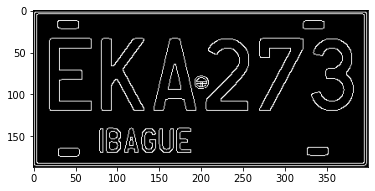

In [6]:
plt.imshow(train_bw[0], cmap='gray')#PLaca como imágen de bordes

In [7]:
def separa_letras(P_gris):
  L0 = P_gris[30:125,15:75]
  L1 = P_gris[30:125,75:135]
  L2 = P_gris[30:125,135:200]
  L3 = P_gris[30:125,200:260]
  L4 = P_gris[30:125,265:325]
  L5 = P_gris[30:125,330:390]
  return L0,L1,L2,L3,L4,L5
db_train  = []
for t in range(len(train_bw)):
  db_train.append(separa_letras(train_bw[t]))
t = 0
db_test  = []
for t in range(len(train_bw)):
  db_test.append(separa_letras(test_bw[0]))

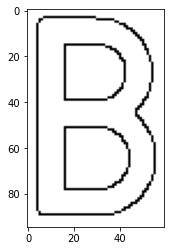

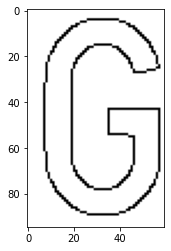

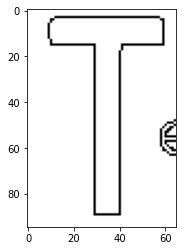

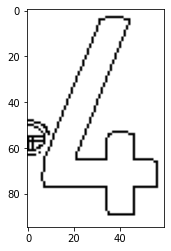

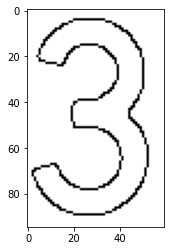

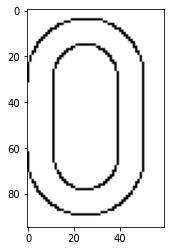

In [8]:
for i in range(len(db_train[1])): plt.imshow(db_train[1][i],'gray_r'); plt.show()

In [ ]:
X = []
Y = []
for i in range(len(letras_train)):
  X.append(letras_train[i][5])
  Y.append(train_Nplaca[i][5])

In [ ]:
Y[0]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

YD = np.zeros([len(Y),1]) #Crea matriz vacía de una columna y tamaño de las muestras en fila
i = 0
for i in range(len(Y)): YD[i] = Y[i] #Paso arreglo columna a fila
'''
XD = np.zeros([len(X)]) #Crea matriz vacía de una columna y tamaño de las muestras en fila
i = 0
for i in range(len(X),1): XD[i] = X[i] #Paso arreglo columna a fila
'''
XD = np.array(X)
tree = DecisionTreeClassifier(max_depth=10, random_state=42)
tree.fit(XD,YD)

In [ ]:
YD[0]

In [ ]:
plt.imshow(X)

In [ ]:
plt.imshow(db_train[0][5],'gray_r'); plt.show()

In [ ]:
plt.imshow(db_train[0][5],'gray_r'); plt.show()

In [ ]:
import numpy as np
np.random.seed(2)

import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from keras.optimizers import SGD


In [ ]:
modelo = Sequential()
modelo.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))



In [ ]:
YL1 = []
for i in range(len(train_Nplaca)): YL1.append(train_Nplaca[i][0])
YL1

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, bootstrap = True, verbose=2, max_features = 'sqrt')
Pred= classifier.fit(train_bw,YL1)

In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
bw= np.array(bw)
bw.flags

In [ ]:
'''
plt.figure(figsize = (100,50))
plt.subplot(1,6,i+1)
plt.axis("off")
muest = cv2.cvtColor(bw[0], cv2.COLOR_BGR2RGB)#pasa de BGR, a RGB ó gris
plt.imshow(muest)
plt.subplots_adjust(wspace = 0.5) # espacio entre imagenes
plt.show()
print("Forma:{0}, min: {1}, max{2}".format(muest.shape,muest.min(), muest.max()))
#bw[0].shape# tamaño, y el ulmin número es el canal de colo
'''

In [ ]:
bw.nbytes

In [ ]:
bw.itemsize

In [ ]:
    cv2.imread("testing/0.jpg")

In [ ]:
    cv2.imread("testing/0.jpg",0)

In [ ]:
    cv2.imread("testing/0.jpg",1)